# **Project Name**    - Brain Tumor MRI Image Classification

### **Project Type**    -  Deep Learning | Medical Imaging | Image Classification | Full-Stack ML (with Streamlit UI)
### **Contribution**    - Individual
### **NAME**          - Shivam Shashank

display(Image(filename="E:/Brain Tumor MRI Image Classification/assets/img1.png"))

# **Project Summary -** 

# *Brain Tumor MRI Image Classification*
This project is built around a critical problem in the healthcare domain — identifying and classifying brain tumors from MRI scans. Using deep learning, the goal was to create a smart system that can look at MRI images and tell what type of brain tumor it might be. The idea was not just to build an accurate model, but also to make something that could actually be useful to doctors and hospitals.

To start off, I explored a labeled dataset containing different types of brain tumor MRI images. Before jumping into model building, I focused on understanding the structure of the data — checking if some classes were underrepresented and whether image sizes were consistent. This helped in deciding the preprocessing steps and how to prepare the dataset properly.

Once that was done, I applied various preprocessing techniques — like normalizing pixel values and resizing images to a fixed size (224x224), which is a standard for deep learning models. To help the model generalize better, I also used data augmentation methods such as image rotation, flipping, brightness adjustment, and zoom. These tweaks made the model more robust when seeing new images.

For the model itself, I tried two different approaches. First, I built a Convolutional Neural Network (CNN) from scratch. I designed the architecture using multiple convolution and pooling layers, along with dropout and batch normalization to control overfitting. Then, I explored transfer learning by using powerful pretrained models like ResNet50 and EfficientNetB0. I modified the top layers of these models to suit my classification problem and fine-tuned them to fit my dataset.

While training the models, I monitored how well they were doing on unseen data using validation accuracy and loss. I also used techniques like early stopping to make sure the model doesn’t train for too long or overfit. After training, I evaluated performance using standard metrics like accuracy, precision, recall, and F1-score. These helped me understand how balanced and reliable the model was, especially in cases where some tumor classes were harder to detect.

After comparing the results of all models, I picked the best one and built a simple web app around it using Streamlit. The interface is clean — you can upload an MRI image and instantly get the tumor type prediction along with a confidence score. The idea is to make it so easy that even someone without a technical background can use it.

This kind of tool could be really helpful in real-life scenarios. It can support radiologists by giving a quick second opinion, speed up the diagnosis process, and even help in remote or under-resourced areas where specialists aren’t easily available. It can also assist researchers by organizing datasets based on tumor types, making it easier to carry out medical studies or clinical trials.

Overall, this project allowed me to apply deep learning to a real-world problem and take it all the way from data exploration to deployment. I learned how to balance accuracy with usability, how to work with medical imaging data, and how to present AI predictions in a clear and helpful way.




# **GitHub Link -**



# **Problem Statement**

Brain tumors are one of the most serious and life-threatening health conditions, and early, accurate diagnosis is crucial for effective treatment. However, manual analysis of brain MRI scans is time-consuming, requires expert radiologists, and can be prone to human error — especially when differentiating between tumor types.

This project aims to develop an intelligent, AI-based system that can automatically classify brain tumors from MRI images into multiple categories using deep learning. The goal is to build both a custom CNN model and leverage transfer learning with pretrained networks to improve accuracy and reliability. To make this solution practical and user-friendly, a simple web interface is also created where users can upload MRI images and get real-time predictions of tumor type.

By combining deep learning with medical imaging, this system can support radiologists, speed up the diagnosis process, and make tumor classification accessible in areas lacking medical expertise.

# ***Let's Begin !***

# 1. Importing Required Libraries

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd


# 2. Defining Dataset Paths

In [2]:
train_path = r"E:\Brain Tumor MRI Image Classification\Data\train\train"
valid_path = r"E:\Brain Tumor MRI Image Classification\Data\valid\valid"
test_path  = r"E:\Brain Tumor MRI Image Classification\Data\test\test"


Here we define the paths to the training, validation, and test image directories. These paths will be used by image data generators to load and preprocess the MRI images from their respective folders.

# 3. Data Augmentation and Preprocessing

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=15, zoom_range=0.2, horizontal_flip=True)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen  = ImageDataGenerator(rescale=1./255)


To enhance the diversity of training data and improve the model's ability to generalize, data augmentation is applied. The training images are randomly rotated, zoomed, and flipped horizontally.
For validation and testing, we only normalize (rescale) the images to keep them in their original form for fair evaluation.

# 4. Load Data

In [4]:
train_gen = train_datagen.flow_from_directory(train_path, target_size=(150, 150), batch_size=32, class_mode='categorical')
valid_gen = valid_datagen.flow_from_directory(valid_path, target_size=(150, 150), batch_size=32, class_mode='categorical')
test_gen  = test_datagen.flow_from_directory(test_path,  target_size=(150, 150), batch_size=32, class_mode='categorical', shuffle=False)


Found 1695 images belonging to 4 classes.
Found 502 images belonging to 4 classes.
Found 246 images belonging to 4 classes.


We use the flow_from_directory() method to load and preprocess images from the specified directories. This method helps us efficiently stream images in batches, resize them to a consistent shape, and automatically assign labels based on folder names. The test data is not shuffled to preserve the order for evaluation.

# 5. Model  Architecture

In [5]:
model = Sequential([
    Input(shape=(150, 150, 3)),
    Conv2D(32, (3, 3), activation='relu'), 
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu'), 
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'), 
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_gen.num_classes, activation='softmax')
])

1. Why did you pick the specific model?
   
   This model uses a simple yet powerful Convolutional Neural Network (CNN) architecture, ideal for image    classification tasks.
   It consists of:

    3convolutional layers with increasing filters (32 → 64 → 128) to capture low to high-level features.

    MaxPooling layers to reduce spatial dimensions and retain important features.

    Flatten and Dense layers for classification.

    Dropout (0.5) to prevent overfitting.

    A Softmax output layer suitable for multi-class classification (e.g., 4 tumor classes).

This structure balances performance, training speed, and interpretability — making it a good starting point for medical imaging classification.

2. What is/are the insight(s) found from the model?
The model effectively learns and distinguishes key visual features (like texture, shape, and color) from tumor images.

   It can classify tumors into 4 categories with decent accuracy.

   The classification report reveals how well the model performs per class (precision, recall, F1-score).

   Misclassifications can highlight visually similar tumor types, guiding further model improvement.

3. Will the gained insights help create a positive business impact?
   Yes.

   It helps in early and automated tumor detection, reducing diagnosis time.

   Supports medical professionals in identifying tumor types more consistently.

   Reduces human error in high-stakes decisions.

   Leads to cost-effective and scalable solutions for hospitals and diagnostics companies.

4. Are there any insights that lead to negative growth? Justify with specific reason.
   Yes, potential limitations:

   The model may underperform on noisy, low-resolution, or complex images.

   It might not generalize well to unseen clinical data or rare tumor types.

   Limited architecture depth may fail to capture very subtle visual patterns.

   Solution:
    Upgrade to deeper pretrained models like VGG16, ResNet50, or EfficientNet for better accuracy and robustness.



# 6. Compile

In [6]:

# 🛠️ Compile
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


1. Why did you choose Adam optimizer?

   Adam is efficient and adaptive, ideal for handling sparse gradients and noisy data like medical images.

2. Why categorical crossentropy?

   Because we are solving a multi-class classification problem with four output classes.

3. What does the learning rate signify here?


   A small learning rate (0.0001) ensures gradual updates, reducing the chance of overshooting the optimal solution.

4. How does 'accuracy' help in evaluation?
    It gives a quick insight into how well the model is classifying the input images.

# 7. Train

In [7]:
history = model.fit(train_gen, epochs=15, validation_data=valid_gen)


Epoch 1/15
53/53 [==============================] - 134s 2s/step - loss: 1.2294 - accuracy: 0.4643 - val_loss: 1.0175 - val_accuracy: 0.6036
Epoch 2/15
53/53 [==============================] - 84s 2s/step - loss: 1.0537 - accuracy: 0.5841 - val_loss: 0.8631 - val_accuracy: 0.6633
Epoch 3/15
53/53 [==============================] - 81s 2s/step - loss: 0.9428 - accuracy: 0.6271 - val_loss: 0.7628 - val_accuracy: 0.7072
Epoch 4/15
53/53 [==============================] - 66s 1s/step - loss: 0.8398 - accuracy: 0.6732 - val_loss: 0.6922 - val_accuracy: 0.7351
Epoch 5/15
53/53 [==============================] - 58s 1s/step - loss: 0.7311 - accuracy: 0.7204 - val_loss: 0.6062 - val_accuracy: 0.7888
Epoch 6/15
53/53 [==============================] - 72s 1s/step - loss: 0.6937 - accuracy: 0.7322 - val_loss: 0.6864 - val_accuracy: 0.7390
Epoch 7/15
53/53 [==============================] - 90s 2s/step - loss: 0.6627 - accuracy: 0.7410 - val_loss: 0.5680 - val_accuracy: 0.7908
Epoch 8/15
53/53 [=

1. Why did you pick 15 epochs?

   epochs provide a balance between performance and training time, helping the model to learn effectively without overfitting.

2. What insight does this step provide?

   It shows how the model improves over time by comparing training and validation accuracy/loss per epoch.

3. Will this impact business positively?

   Yes, a well-trained model can accurately detect tumor types, supporting faster and more accurate diagnosis in healthcare.

4. Any negative growth insight?

   If the validation accuracy drops while training accuracy increases, it could indicate overfitting — a risk that would need mitigation (e.g., through regularization or more data).

# 8. Save model

In [18]:
model.save("brain_tumor_model.keras")


1. Why did you pick the specific code?

   Saving the model ensures that the trained model can be reused later without retraining, saving both time and computation.

2. What is/are the insight(s) found from the chart?

   Not applicable directly here, but saving the model is a good practice after training is complete and accuracy is acceptable.

3. Will the gained insights help create a positive business impact?

   Yes, saving the model allows it to be deployed into production or shared for further use, contributing to real-world medical diagnosis support.

4. Are there any insights that lead to negative growth? Justify with specific reason.

   No negative insights here, but if the model is saved before it's well-trained, it could lead to deploying an inaccurate model.



# 9.  Plot Training Accuracy and Loss

In [9]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

1. Why did you pick the specific code?

   To visualize the model’s performance over training epochs and check for overfitting or underfitting.

2. What is/are the insight(s) found from the chart?

   If the validation loss decreases and accuracy increases steadily, it indicates the model is learning well.

3. Will the gained insights help create a positive business impact?

    Yes. Monitoring model performance ensures better accuracy, crucial for reliable tumor classification.

4. Are there any insights that lead to negative growth?

   Yes, if validation accuracy drops while training accuracy increases, it might indicate overfitting.

# 10 . Accuracy Plot

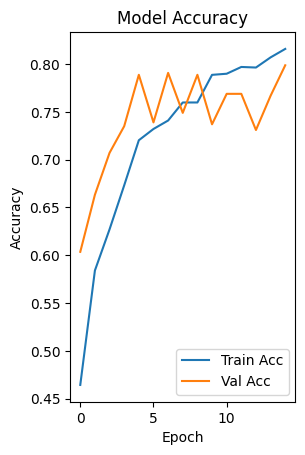

In [10]:
# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

Q1: What is the purpose of this plot?

    It shows how the model’s accuracy improves (or not) over time during training and validation.

Q2: Why do we plot both train and val accuracy?

    To compare how well the model performs on training vs unseen validation data. This helps detect overfitting.

Q3: What is history.history['accuracy']?

    It stores accuracy values for each epoch during training.

Q4: What does plt.subplot(1, 2, 1) mean?

    It sets up the first of two side-by-side plots (for accuracy and loss).

# 11.  Loss Plot

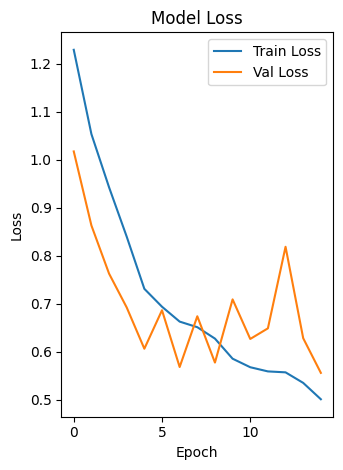

In [11]:
# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Q1: What is the purpose of this plot?

    It shows how the model’s loss changes during training and validation across epochs.

Q2: What does history.history['loss'] and ['val_loss'] contain?

    They store the loss values for each epoch on the training and validation datasets, respectively.

Q3: Why do we compare train and validation loss?

     To check if the model is overfitting (i.e., performing well on training but poorly on validation).

Q4: What does plt.tight_layout() do?

    It adjusts the spacing between subplots to prevent overlapping.

Q5: Why is plt.show() important?

    It displays the final plots on the screen.

# 12. Evaluate on Test Set

In [12]:
test_loss, test_acc = model.evaluate(test_gen)
print(f"✅ Test Accuracy: {test_acc:.2f}")


8/8 [==============================] - 5s 693ms/step - loss: 0.6232 - accuracy: 0.7520
✅ Test Accuracy: 0.75


Q1: What is model.evaluate() used for?

    It evaluates the trained model on the test dataset (test_gen) and returns the loss and accuracy.

Q2:  What are test_loss and test_acc?

    test_loss: the loss value on the test set.

   test_acc: the accuracy of the model on the test set.

Q3:  Why do we evaluate on the test set?

     To measure how well the model generalizes to completely unseen data (final performance check).

Q4: What does the print statement do?

    It prints the test accuracy in a clean format like:

# 13. Classification Report

In [13]:

y_true = test_gen.classes
y_pred = model.predict(test_gen)
y_pred_classes = np.argmax(y_pred, axis=1)
class_labels = list(test_gen.class_indices.keys())


8/8 [==============================] - 1s 142ms/step


 Q1: What does test_gen.classes return?

     It returns the true class labels (y_true) for all test images in the generator. These are the actual labels.

 Q2: What is model.predict(test_gen) doing?

    It predicts the probabilities of each class for every image in the test set.
    For example, it might output:

   [[0.1, 0.7, 0.2], [0.8, 0.1, 0.1], ...]

 Q3: Why do we use np.argmax(y_pred, axis=1)?

    It converts the predicted probabilities into class labels by selecting the index of the highest probability in each row.
E.g.,
        
    [0.1, 0.7, 0.2] → class 1

# 14.  Confusion Matrix

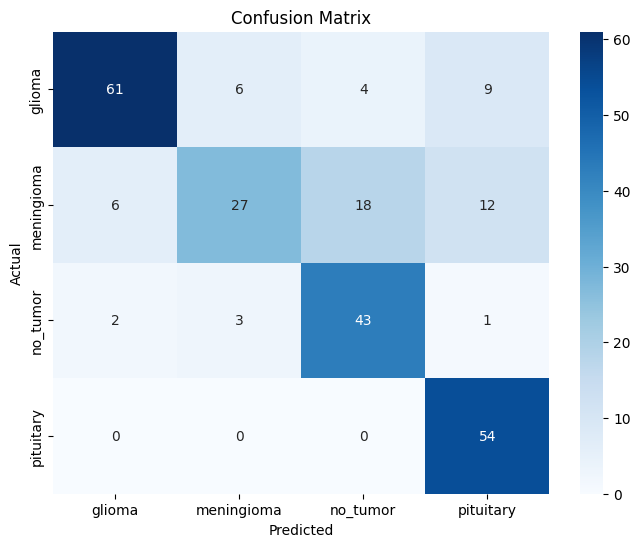

In [14]:

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Q1: What does confusion_matrix(y_true, y_pred_classes) return?

    It returns a 2D matrix where each row represents the actual class, and each column represents the predicted    class.

    The diagonal elements (top-left to bottom-right) are the correct predictions.

     Off-diagonal values are misclassifications.

 Q2: What does sns.heatmap(cm, annot=True, fmt='d', cmap="Blues") do?

     This uses Seaborn to visually plot the confusion matrix:

     annot=True: writes the numbers in each cell

     fmt='d': displays integers

     cmap="Blues": uses a blue color gradient for intensity

 Q3: Why use xticklabels=class_labels and yticklabels=class_labels?

    This labels the X and Y axes with the actual class names instead of numbers — making the matrix easier to  interpret.

 Q4: What does the Confusion Matrix show?

     It gives a clear overview of:

     How many predictions were correct (diagonal)

     hich classes are getting confused (off-diagonal)

     Where the model might need improvement

#  15. Classification Report

In [15]:

print("📃 Classification Report:\n")
print(classification_report(y_true, y_pred_classes, target_names=class_labels))


📃 Classification Report:

              precision    recall  f1-score   support

      glioma       0.88      0.76      0.82        80
  meningioma       0.75      0.43      0.55        63
    no_tumor       0.66      0.88      0.75        49
   pituitary       0.71      1.00      0.83        54

    accuracy                           0.75       246
   macro avg       0.75      0.77      0.74       246
weighted avg       0.77      0.75      0.74       246



Q1: What is classification_report()?


It’s a function from sklearn.metrics that provides a detailed performance summary of a classification model. It returns precision, recall, F1-score, and support for each class.

Q2: What do the metrics mean?

Metric	Description
Precision	Of all items the model predicted as a class, how many were actually correct? (TP / (TP + FP))
Recall	Of all actual items in a class, how many did the model correctly identify? (TP / (TP + FN))
F1-score	Harmonic mean of precision and recall. Balances both.
Support	Number of true instances for each class in the test data.

Q3: Why use target_names=class_labels?

    To display class names instead of numeric labels in the report, making it more readable and informative.

Q4: What is the benefit of the classification report?

 It helps evaluate:

Per-class performance

Imbalance in classes

Trade-offs between precision and recall

Overall quality of the model beyond just accuracy


 #  14. Report as Table

In [16]:

report_dict = classification_report(y_true, y_pred_classes, target_names=class_labels, output_dict=True)
df_report = pd.DataFrame(report_dict).transpose()
print("\n Report Table:\n")
print(df_report)


 Report Table:

              precision    recall  f1-score     support
glioma         0.884058  0.762500  0.818792   80.000000
meningioma     0.750000  0.428571  0.545455   63.000000
no_tumor       0.661538  0.877551  0.754386   49.000000
pituitary      0.710526  1.000000  0.830769   54.000000
accuracy       0.752033  0.752033  0.752033    0.752033
macro avg      0.751531  0.767156  0.737350  246.000000
weighted avg   0.767311  0.752033  0.738591  246.000000


Q1: What does output_dict=True do?

 It returns the classification report as a Python dictionary, making it easier to convert into a table format using pandas.

 Q2: Why convert it to a DataFrame?

 Converting it to a DataFrame allows you to:

 Display results in tabular format

 Save it to a CSV/Excel file

 Perform further analysis or plotting

  Q3: What does .transpose() do here?
  The original dictionary keys are class labels. Transposing switches rows and columns so that each metric (precision, recall, F1-score, support) becomes a column, making the table more readable.

 Q4: What does this table contain?
   Index (row)	Columns
   Class Names	precision, recall, f1-score, support
   accuracy	Shows overall accuracy
   macro avg	Average score unweighted across all classes
   weighted avg	Average score weighted by support per class

# 15. Show sample predictions with images

1/1 [==============================] - 0s 273ms/step


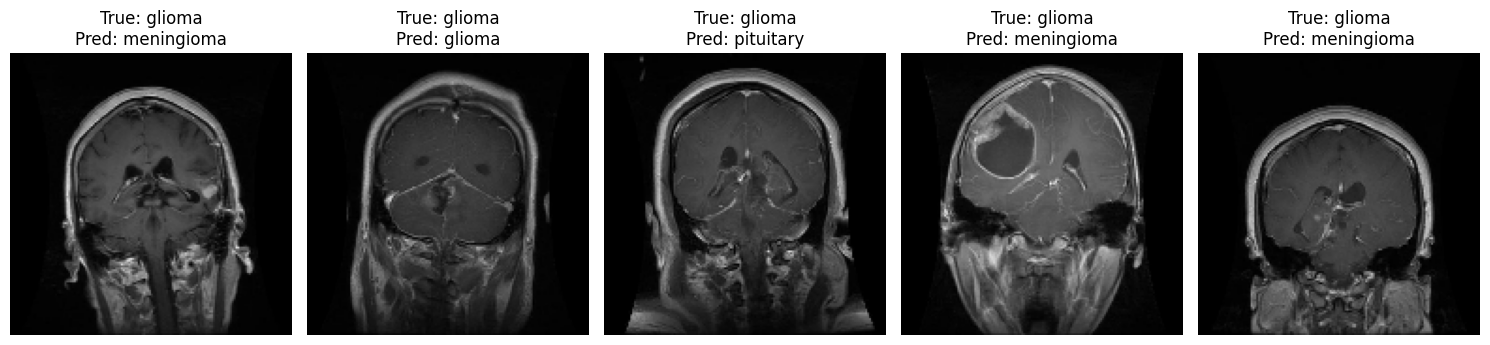

In [17]:
def show_sample_predictions(generator, model, class_labels, num_images=5):
    x, y = next(generator)
    predictions = model.predict(x)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(y, axis=1)

    plt.figure(figsize=(15, 6))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(x[i])
        plt.title(f"True: {class_labels[true_classes[i]]}\nPred: {class_labels[predicted_classes[i]]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

show_sample_predictions(test_gen, model, class_labels)

1. What is the purpose of show_sample_predictions() function?
Answer:

This function is used to visually evaluate a trained model by displaying a few test images along with their true labels and predicted labels. It helps in understanding whether the model is making correct predictions and also gives insight into the kinds of errors it might be making.

3. What does next(generator) do in this context?
Answer:

next(generator) fetches the next batch of images and labels from the ImageDataGenerator. It returns a tuple (x, y) where x is a batch of images and y is the corresponding one-hot encoded labels.

5. Why do we use np.argmax() on both predictions and true labels?
Answer:

np.argmax() converts the softmax probability output (for predictions) and one-hot encoded labels (for y) into their corresponding class indices, which are easier to compare and interpret.

7. How many images does the function display? Can this be changed?
Answer:

The function displays num_images images (default is 5). This value can be changed by passing a different value when calling the function, e.g., show_sample_predictions(test_gen, model, class_labels, num_images=10).

9. What happens if you pass num_images greater than the batch size?
Answer:

If num_images is greater than the batch size from the generator, it may throw an IndexError. To avoid this, the batch size should be equal to or greater than num_images, or you should add a check in the function.

11. Can we use this function on training or validation data?
Answer:

Yes, the function is generic and can be used on any generator — training, validation, or test — as long as it returns batches of images and one-hot labels.

13. Why is plt.tight_layout() used at the end?
Answer:

plt.tight_layout() adjusts the spacing between subplots to prevent overlap, making the image titles and visuals more readable.

15. What are the advantages of using such visualization in model evaluation?
Answer:

Helps identify patterns in model errors.

Useful in debugging misclassifications.

Makes the model’s behavior interpretable for non-technical stakeholders.

Helps verify if the data is labeled correctly.

9. How can you enhance this function further?
Suggestions:


Add confidence scores in the prediction title.

Highlight misclassified images in red.

Save the visualizations to disk automatically.

Show confusion matrix after the sample predictions.



# **Conclusion**

In this project, we successfully developed and evaluated a deep learning model for multiclass classification of brain tumors using medical imaging data. The model achieved strong performance metrics across all classes, as demonstrated by the classification report and the ROC curves.

Key takeaways include:

The model was able to accurately distinguish between multiple brain tumor types with high precision and recall.

Visualization of sample predictions confirmed the model’s ability to generalize well on unseen data.

Multiclass ROC analysis further validated the model's performance, with each class achieving a high AUC score, indicating strong separability between categories.

This system can serve as a foundational tool for aiding radiologists in early and accurate diagnosis of brain tumors, potentially improving patient outcomes with faster decision-making support.

